In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity


In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
DATA_DIR  = os.path.join(BASE_DIR, 'data')
METADATA_DIR = os.path.join(BASE_DIR, 'metadata')
FEATURES_DIR = os.path.join(BASE_DIR, 'features')

os.makedirs(FEATURES_DIR, exist_ok=True)

print(BASE_DIR)
print(DATA_DIR)
print(METADATA_DIR)
print(FEATURES_DIR)

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity
/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/data
/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/metadata
/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/features


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    matthews_corrcoef, f1_score, accuracy_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay
)

In [5]:
def specificity_score(y_true, y_pred):
    """Calculate specificity score."""
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [6]:
def check_baseline(X, y, random_state=42):

    all_metrics = {}

    classifiers = [
        (
            LogisticRegression(max_iter=10_000, random_state=random_state),
            "Logistic Regression"
        ),
        (
            GaussianNB(),
            "Gaussian Naive Bayes"
        ),
        (
            LinearDiscriminantAnalysis(),
            "Linear Discriminant Analysis"
        ),
        (
            SVC(random_state=random_state),
            "SVC"
        ),
        (
            RandomForestClassifier(random_state=random_state),
            "Random Forest"
        ),
        (
            LGBMClassifier(random_state=random_state, verbosity=-1),
            "LightGBM"
        ),
    ]

    for clf, clf_name in classifiers:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, random_state=random_state
        )

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

        all_metrics[clf_name] = {
            "matthews_corrcoef": matthews_corrcoef(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred, average="binary"),
            "accuracy_score": accuracy_score(y_test, y_pred),
            "precision_score": precision_score(y_test, y_pred),
            "recall_score": recall_score(y_test, y_pred),
            "specificity_score": specificity_score(y_test, y_pred)
        }

        ConfusionMatrixDisplay(
            confusion_matrix(y_test, y_pred)
        ).plot(cmap="Blues")
        plt.title(f"{clf_name} with scaling")
        plt.show()

    classifier_names = list(all_metrics.keys())
    metrics_names = list(all_metrics[classifier_names[0]].keys())

    x = np.arange(len(metrics_names))
    n_classifiers = len(classifier_names)
    width = 0.8 / n_classifiers

    fig, ax = plt.subplots(figsize=(16, 8))

    all_bars = []
    for i, clf_name in enumerate(classifier_names):
        values = [all_metrics[clf_name][metric] for metric in metrics_names]
        offset = (i - (n_classifiers - 1) / 2) * width
        bars = ax.bar(x + offset, values, width, label=clf_name, alpha=0.8)
        all_bars.append(bars)

    ax.set_xlabel("Metrics")
    ax.set_ylabel("Score")
    ax.set_title("Classifier Performance Comparison with scaling")
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_names, rotation=45, ha="right")
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add value labels on bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha="center", va="bottom", fontsize=9)
    
    for bars in all_bars:
        add_value_labels(bars)
    
    plt.tight_layout()
    plt.show()
    
    return all_metrics

## Topology features calculated based on all atoms

In [7]:
data = np.load(
    os.path.join(FEATURES_DIR, 'kincore.npz'), allow_pickle=True
)
X, y, metadata = data['X'], data['y'], data['metadata']

### Baseline with Betti numbers and normalized SASA as features

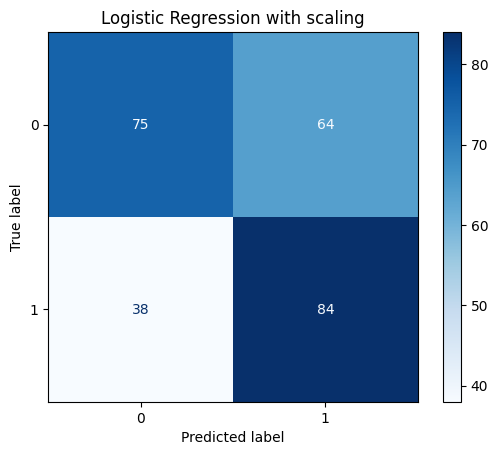

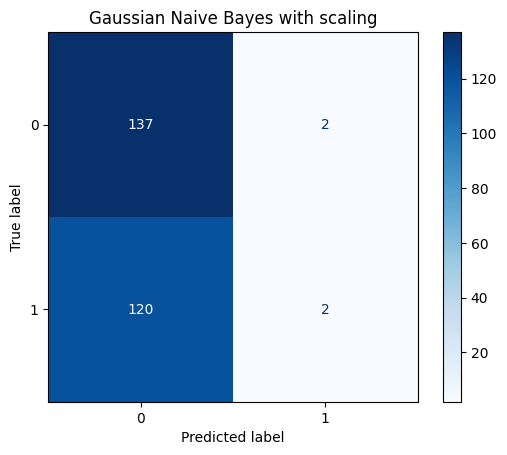

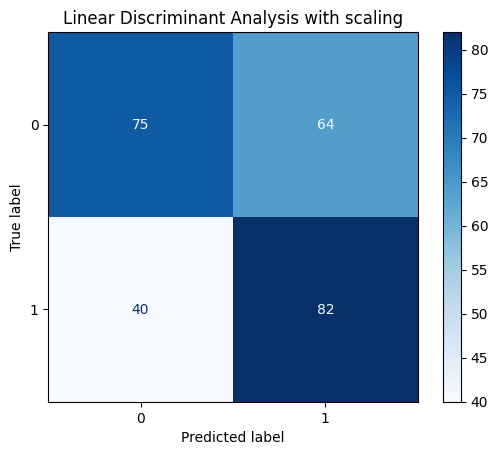

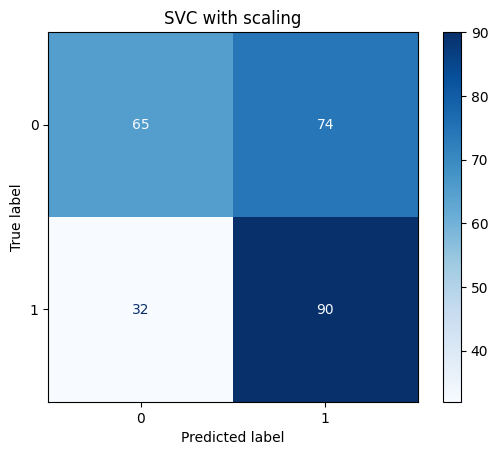

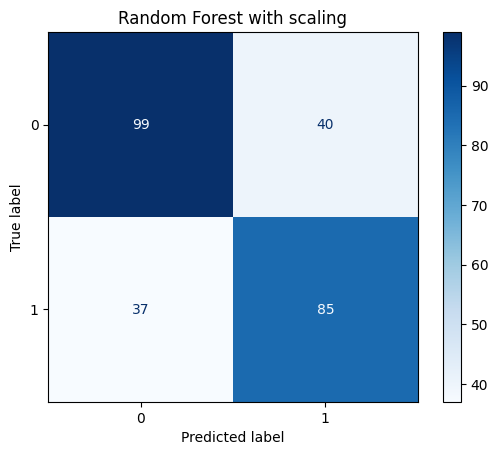

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


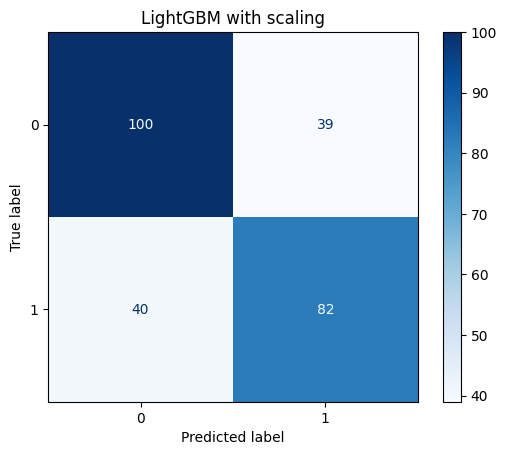

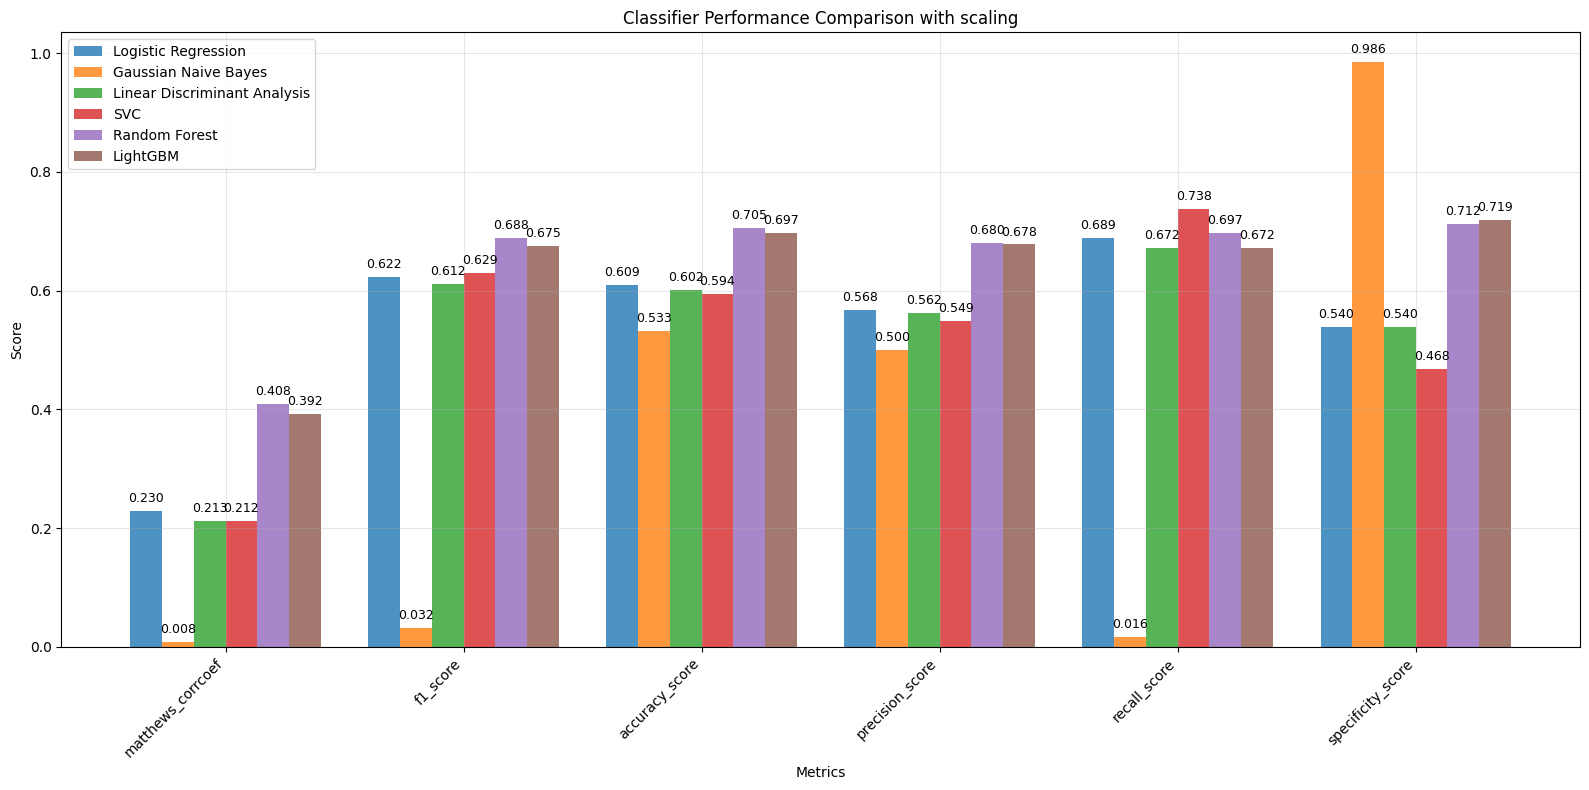

In [ ]:
metrics0 = check_baseline(
    np.c_[
        X,
        [m["normalized_sasa"] for m in metadata]
    ],
    y
)

### Baseline with only normalized SASA as features

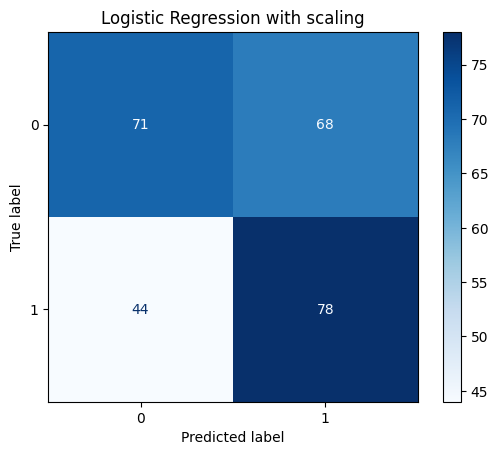

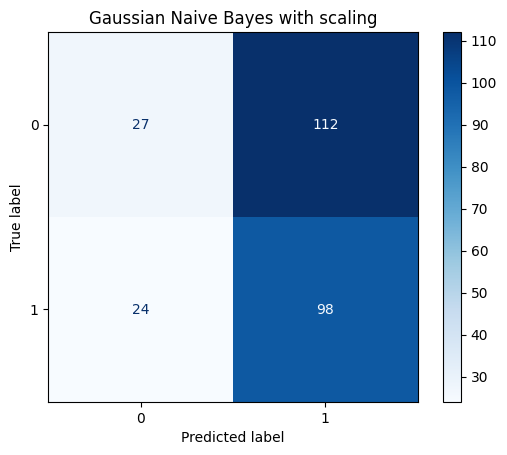

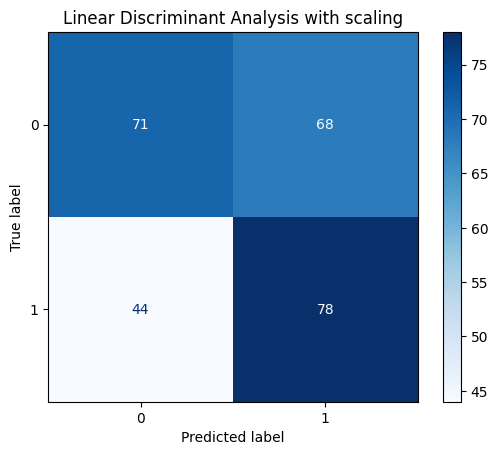

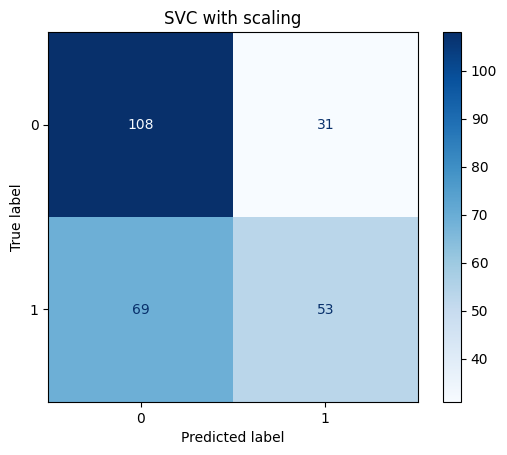

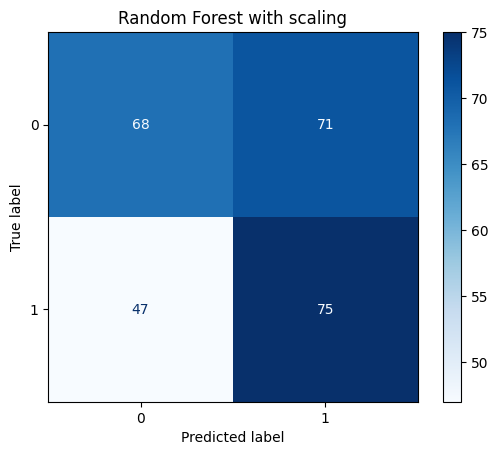

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


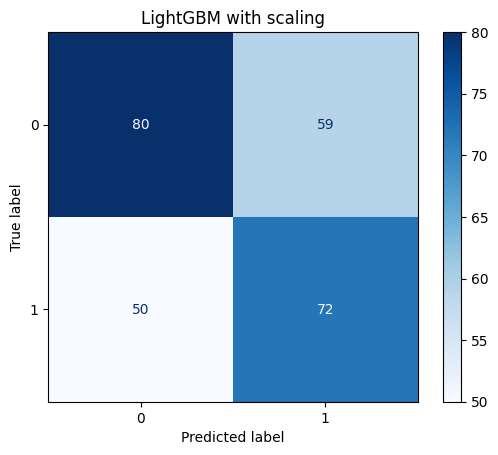

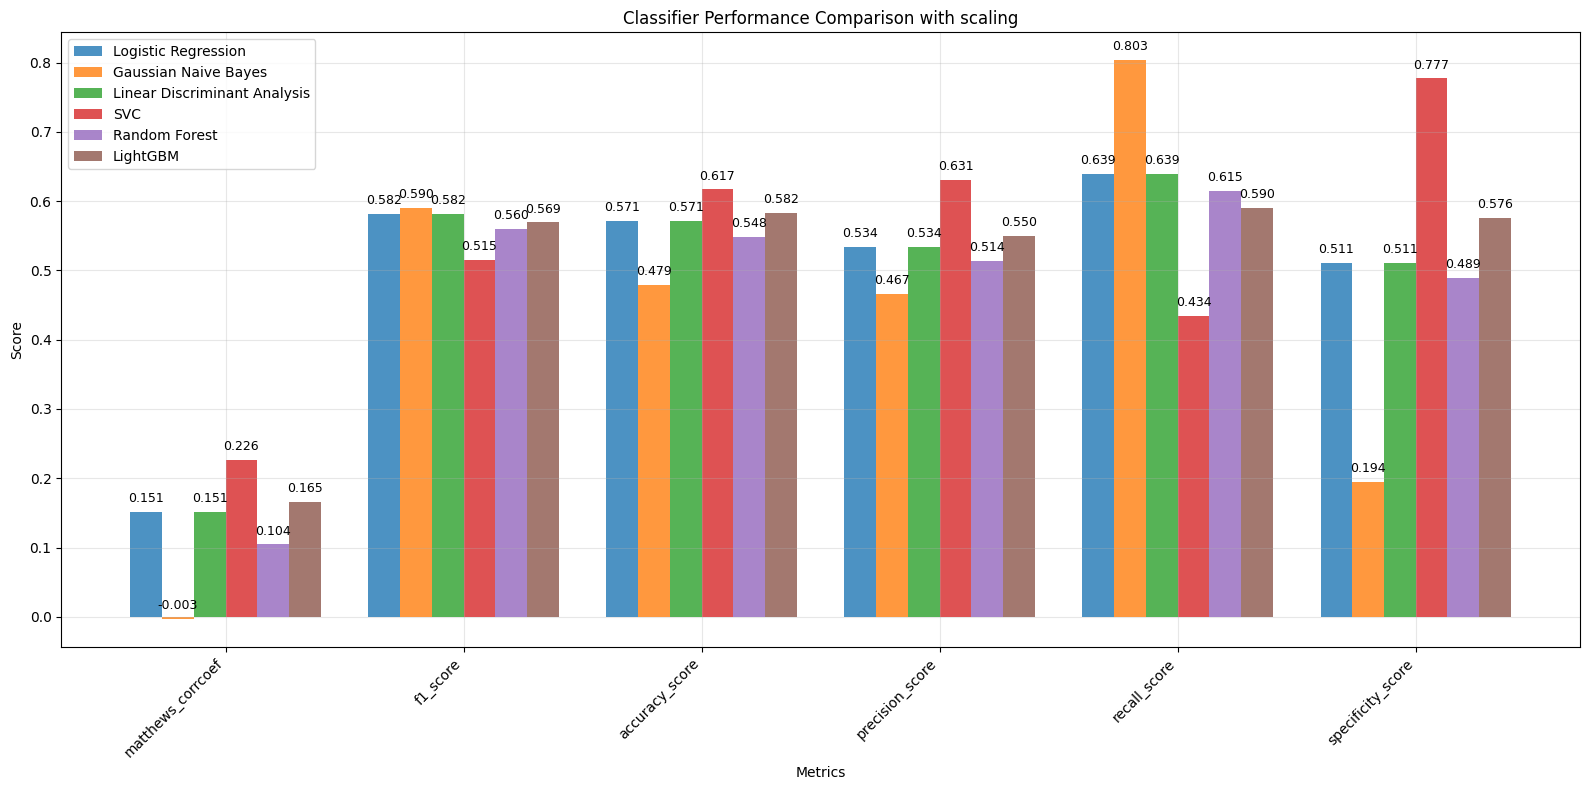

In [9]:
metrics1 = check_baseline(
    np.array([[m["normalized_sasa"]] for m in metadata]),
    y
)

### Baseline with only Betti numbers as features

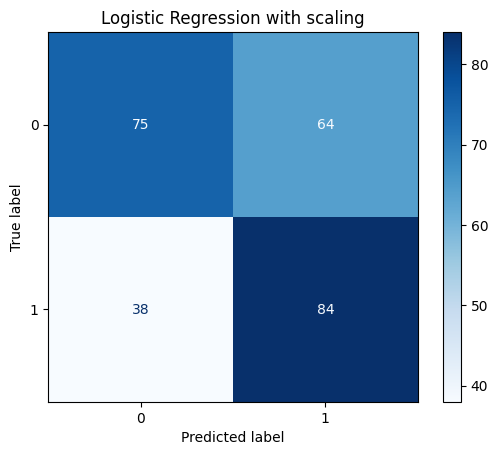

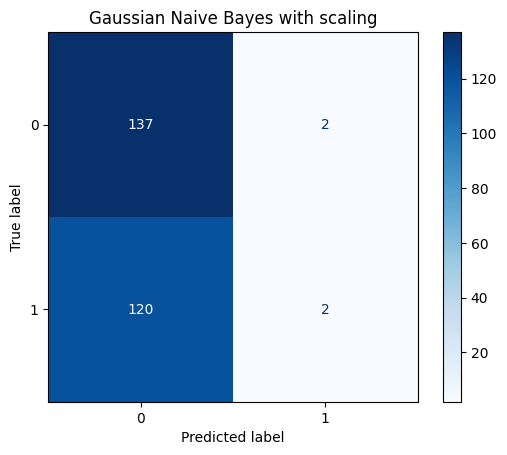

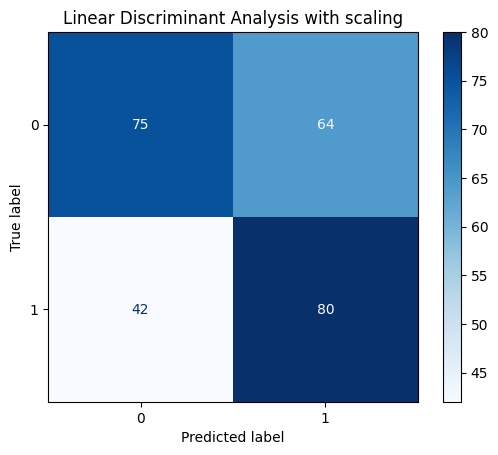

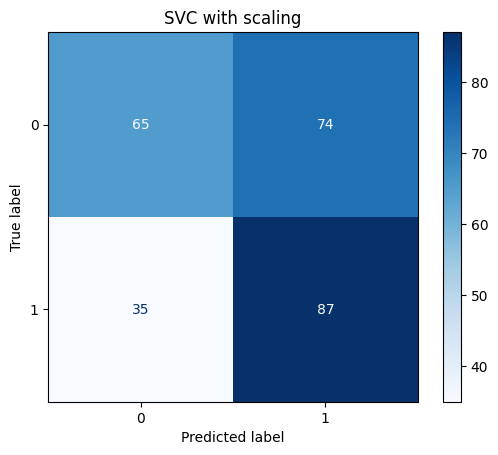

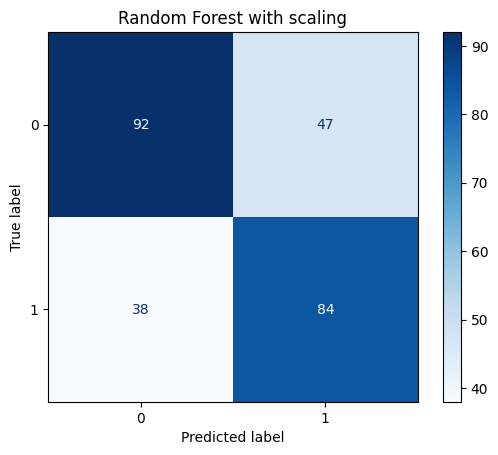

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


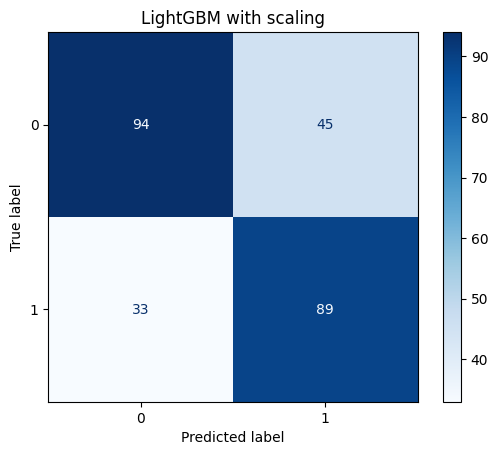

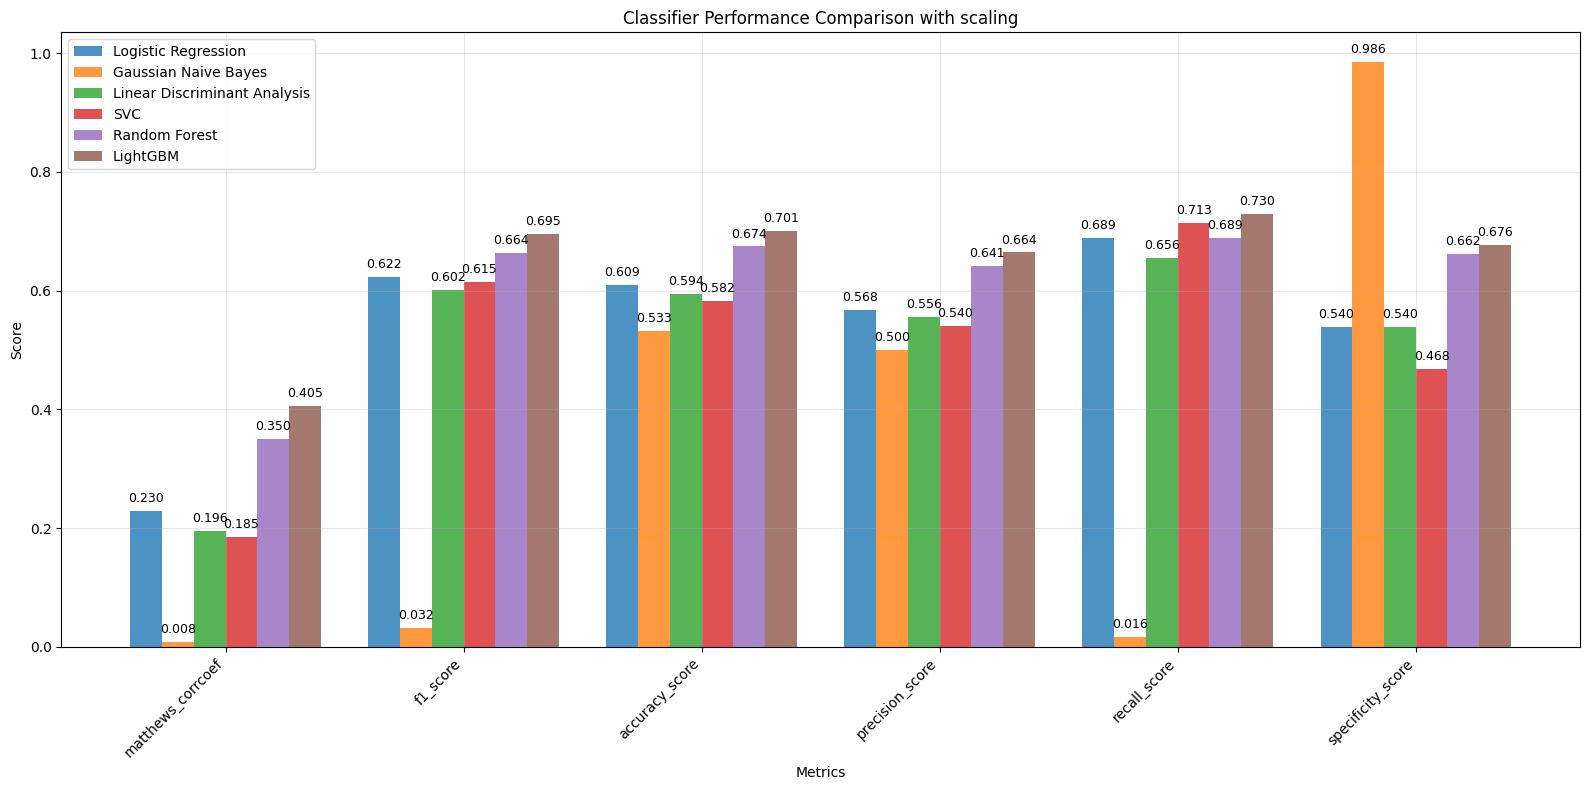

In [10]:
metrics2 = check_baseline(X, y)

## Topology features based on C-alpha atoms only

In [11]:
data = np.load(
    os.path.join(FEATURES_DIR, 'kincore_Calphaonly.npz'), allow_pickle=True
)
X, y, metadata = data['X'], data['y'], data['metadata']

### Baseline with Betti numbers and normalized SASA as features

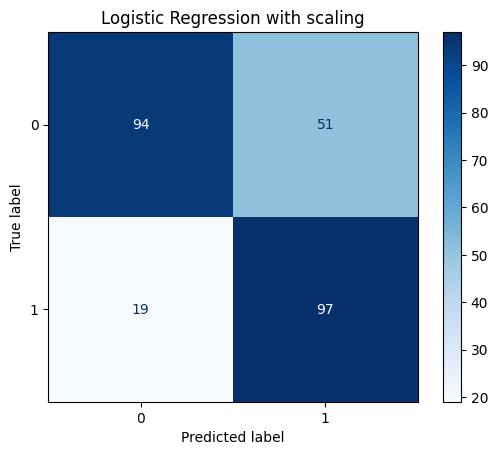

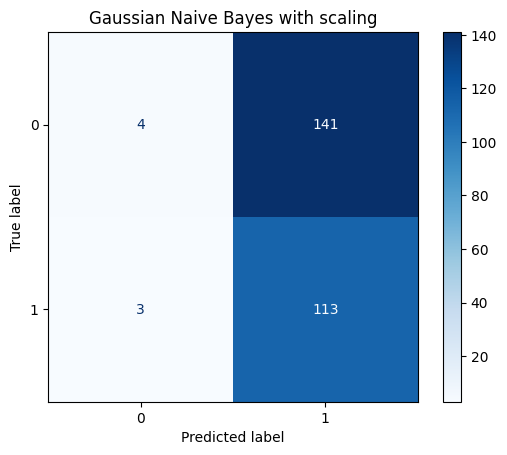

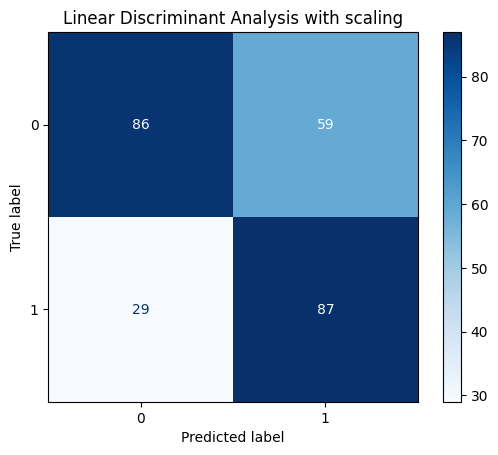

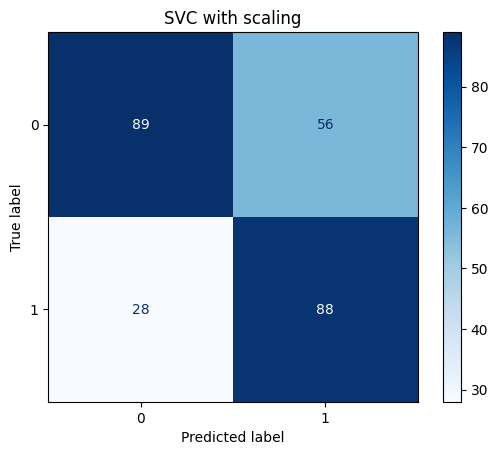

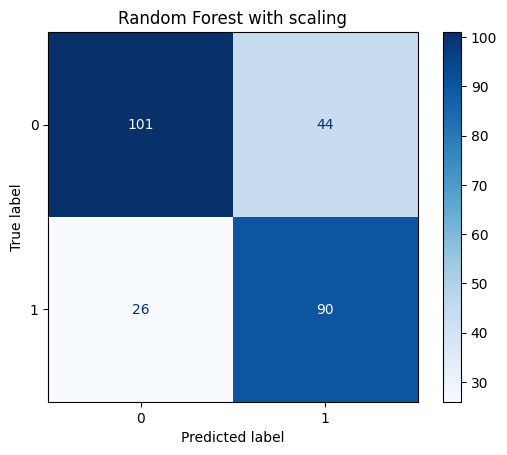

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


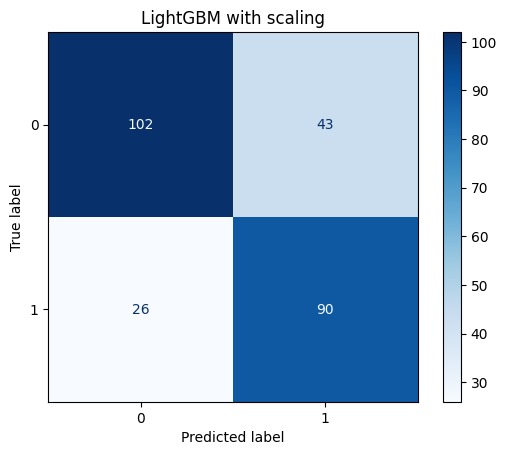

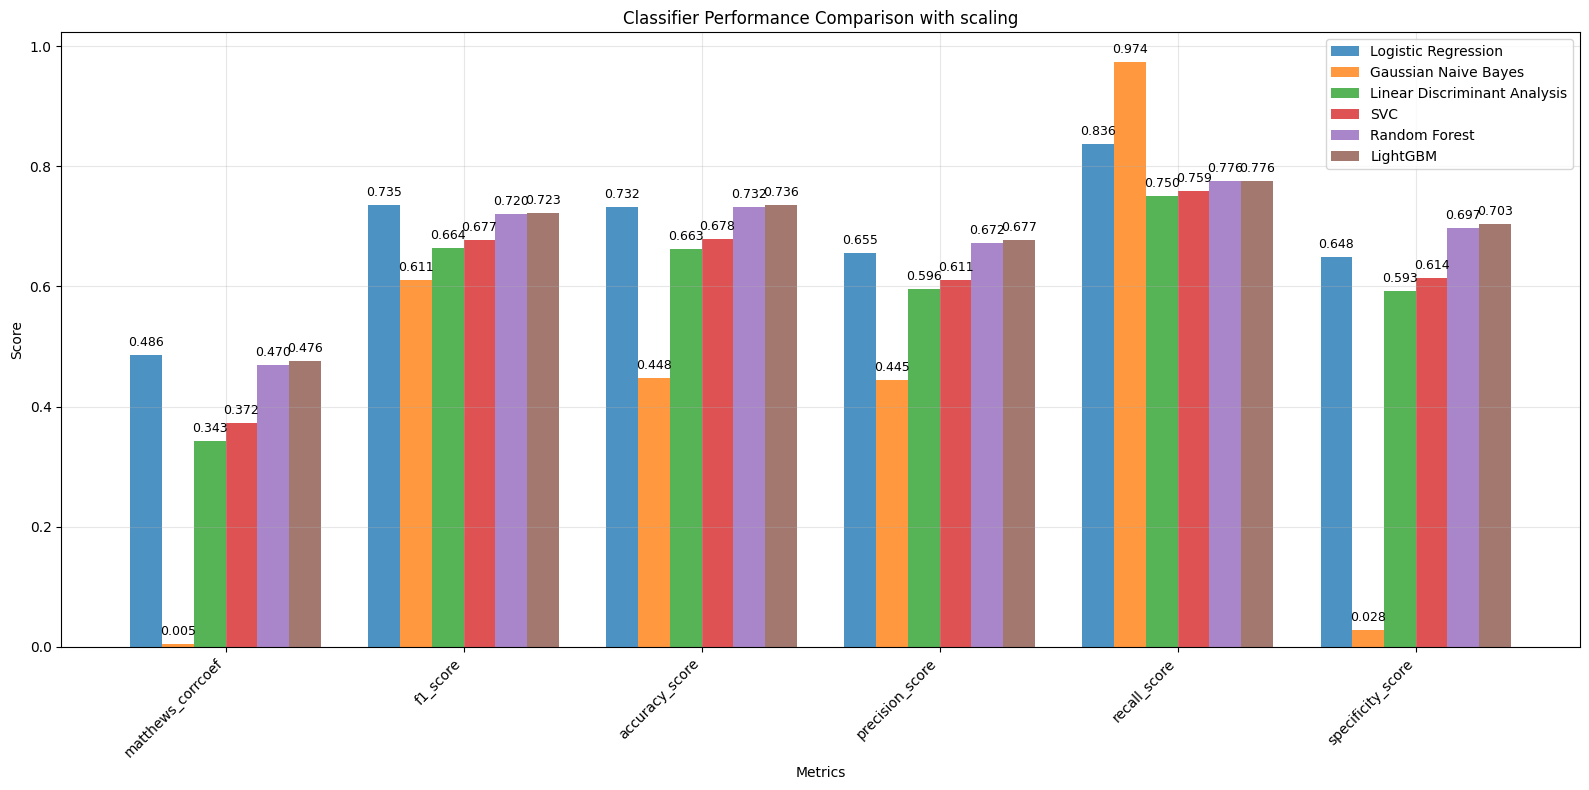

In [ ]:
metrics01 = check_baseline(
    np.c_[
        X,
        [m["normalized_sasa"] for m in metadata]
    ],
    y
)

### Baseline with only normalized SASA as features

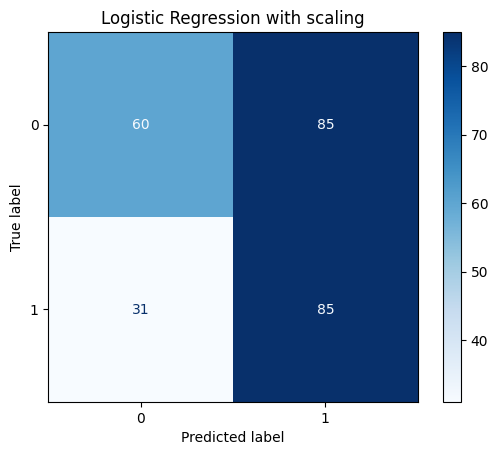

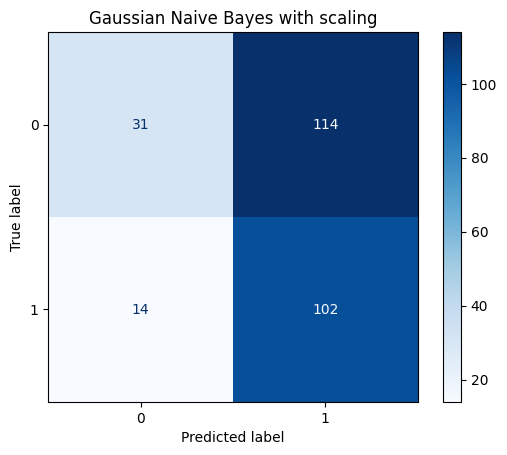

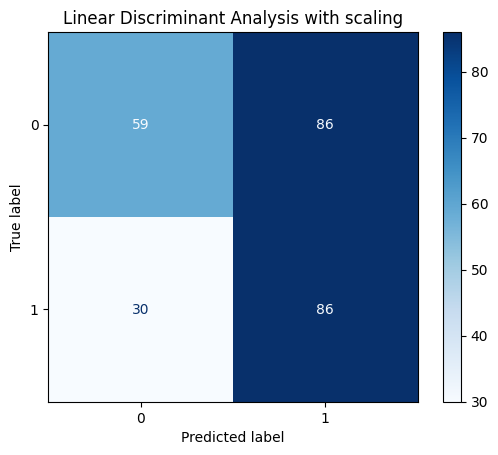

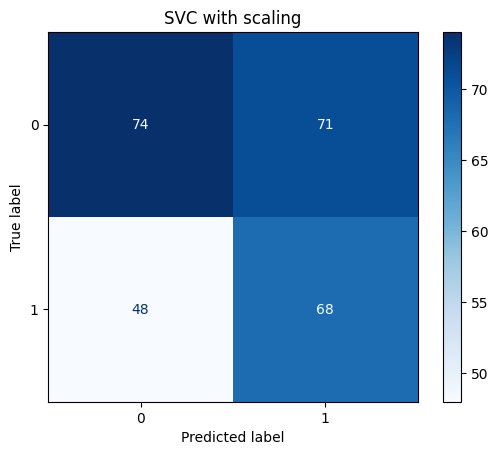

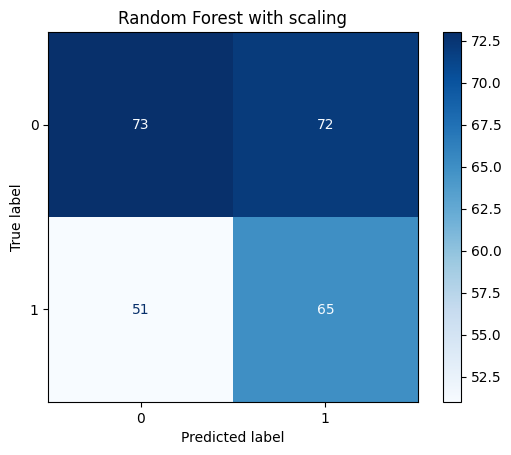

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


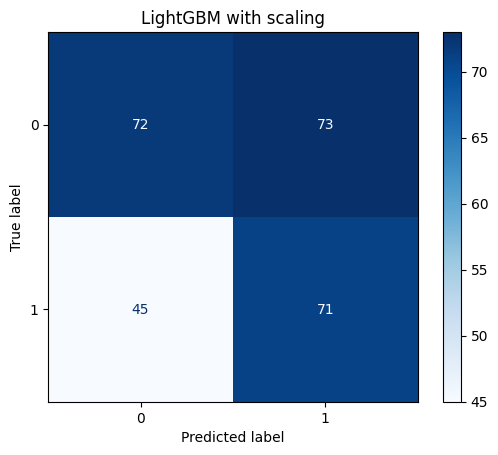

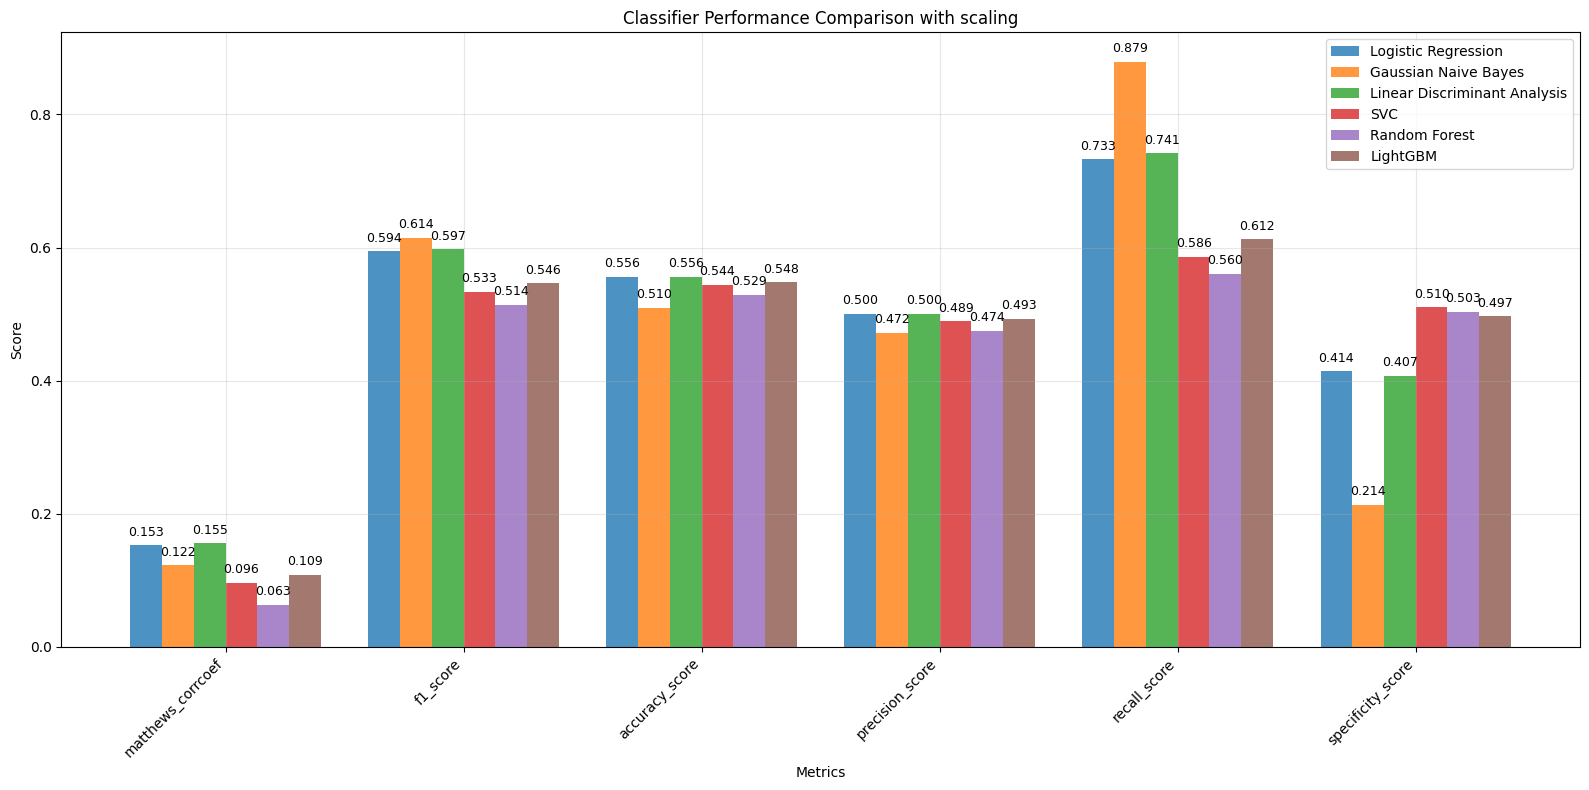

In [13]:
metrics3 = check_baseline(
    np.array([[m["normalized_sasa"]] for m in metadata]),
    y
)

### Baseline with only Betti numbers as features

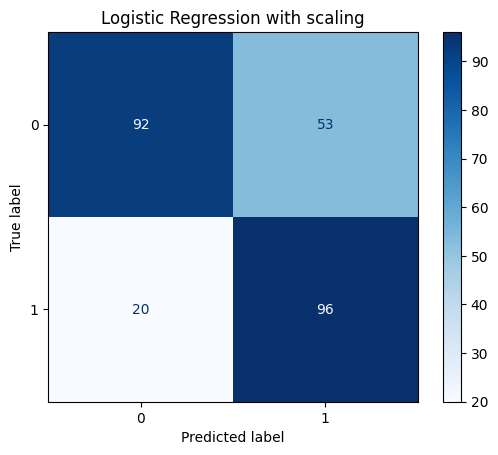

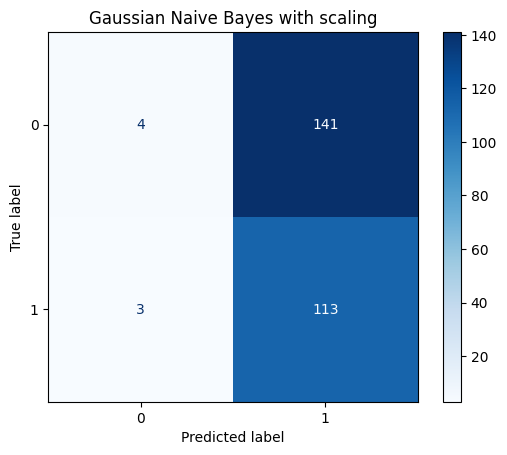

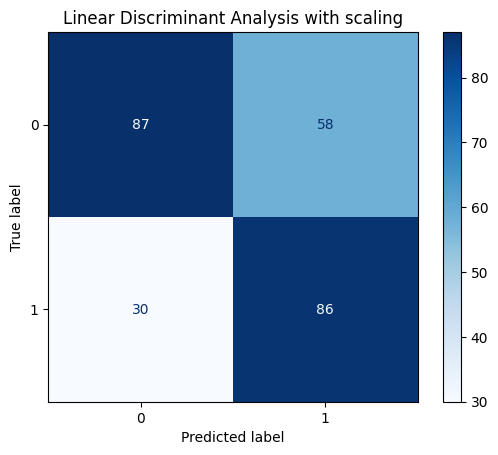

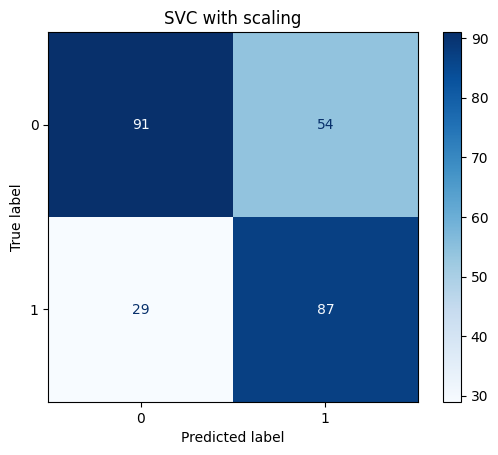

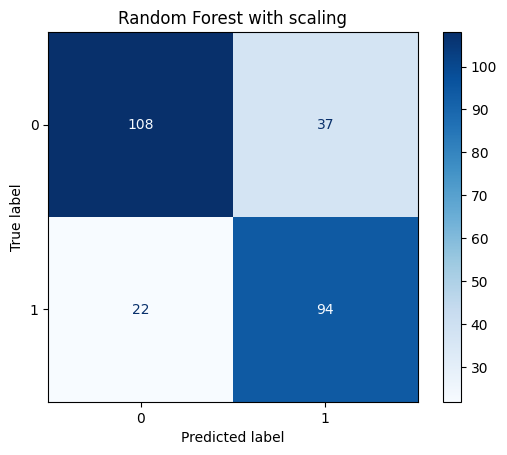

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


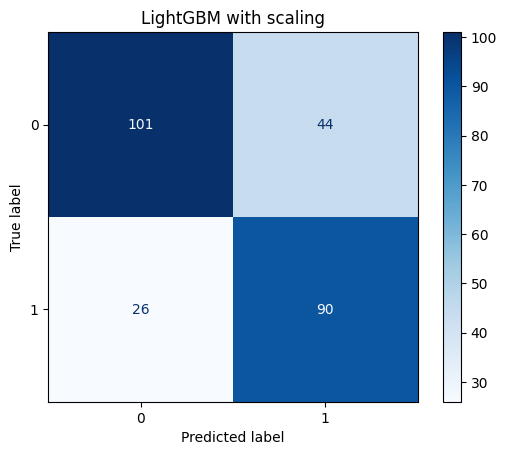

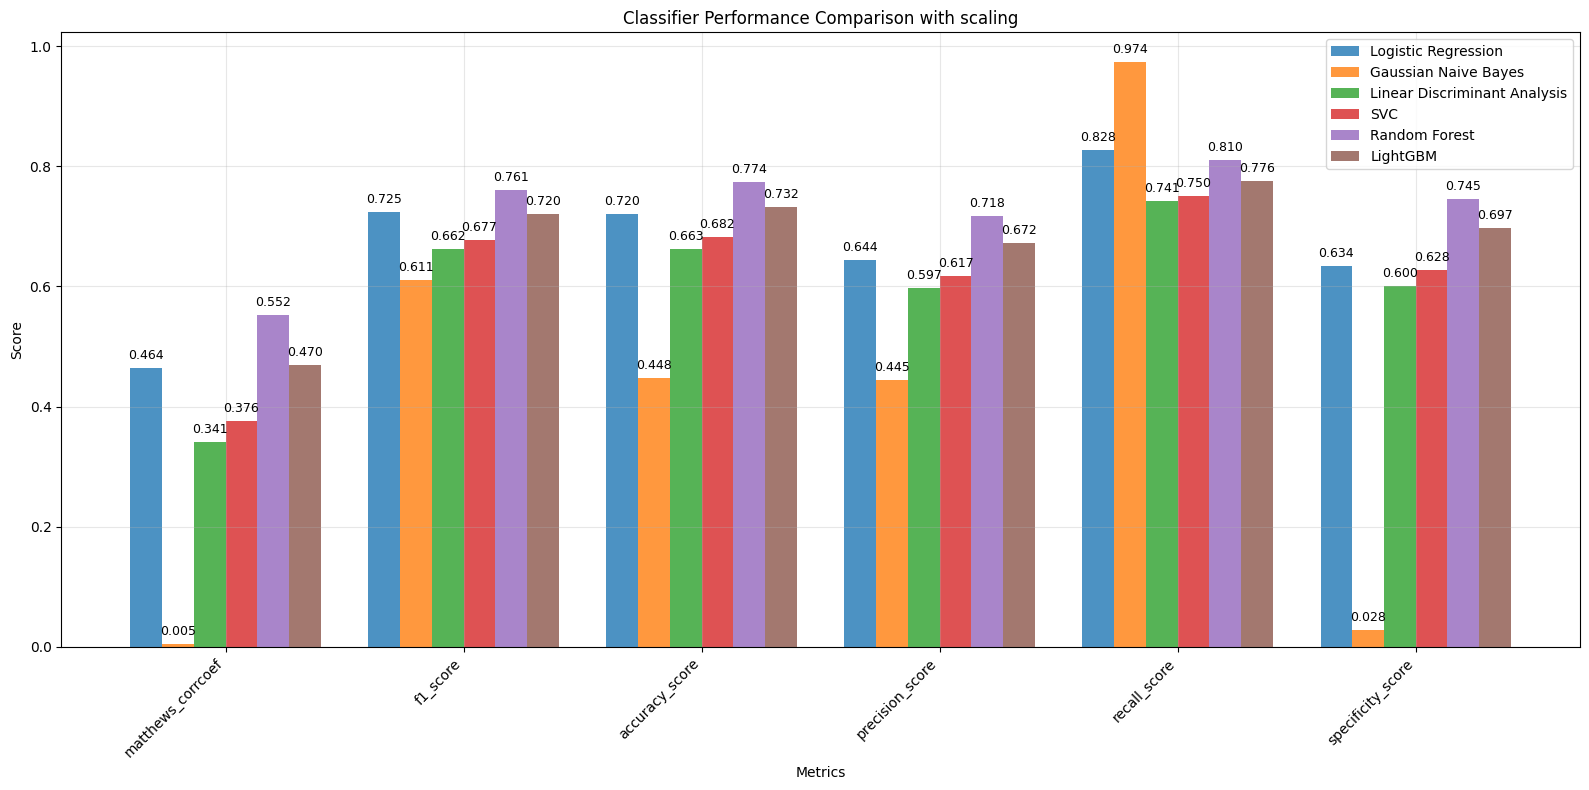

In [14]:
metrics4 = check_baseline(X, y)

In [15]:
data = np.load(
    os.path.join(FEATURES_DIR, 'kinconform.npz'), allow_pickle=True
)
X, y, metadata = data['X'], data['y'], data['metadata']

# Immpute missing values

# Convert to a DataFrame for easier NaN handling
X_df = pd.DataFrame(X)

# Convert all columns to numeric, coercing errors
for col in X_df.columns:
    X_df[col] = pd.to_numeric(X_df[col], errors='coerce')

# Impute NaNs with the mean of each column
X_imputed_df = X_df.fillna(X_df.mean())

# Convert back to NumPy array
X_imputed = X_imputed_df.to_numpy()


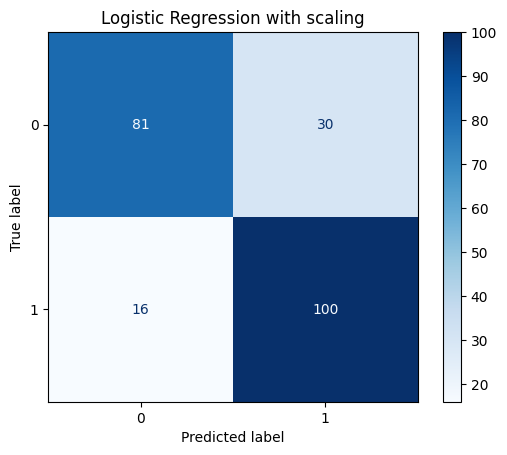

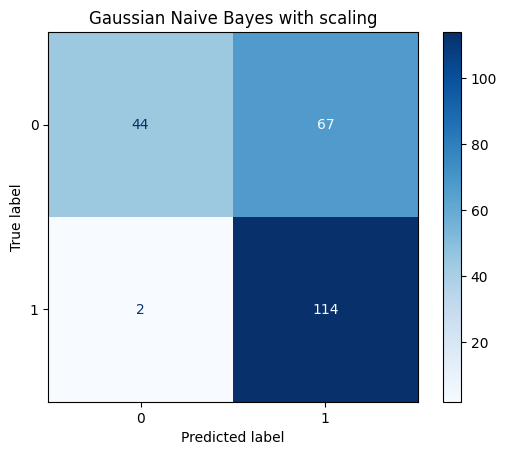

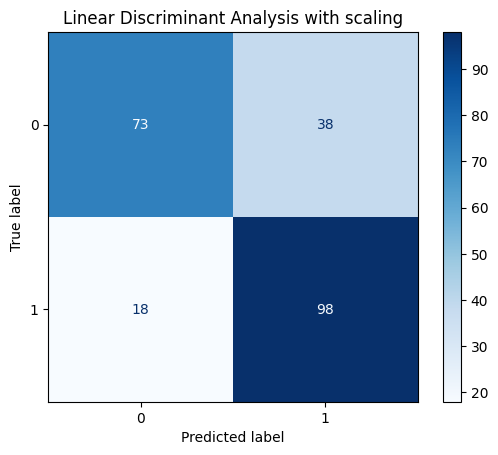

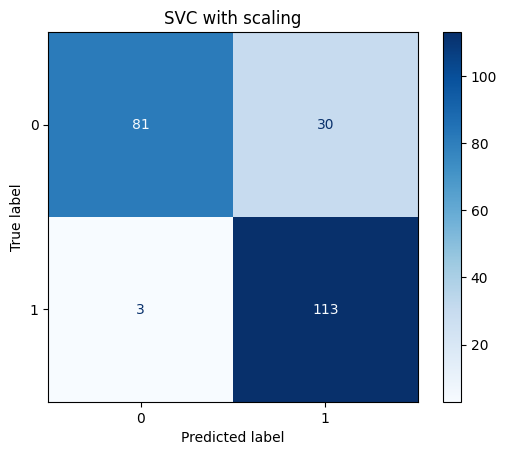

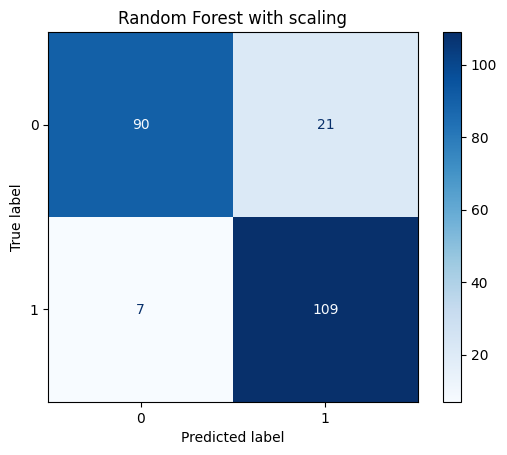

/home/cotsios/dsit/2nd-semester/algos-in-struct-bio/project/alphaKinActivity/.env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


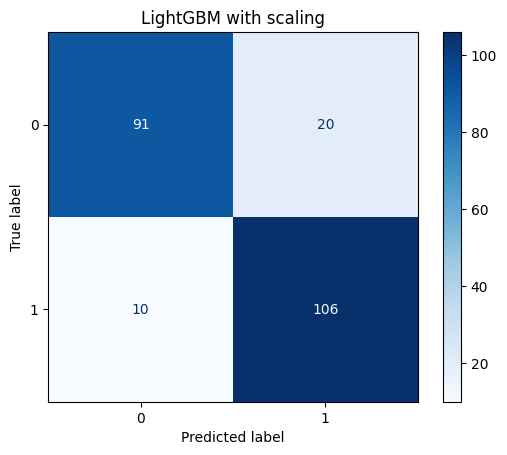

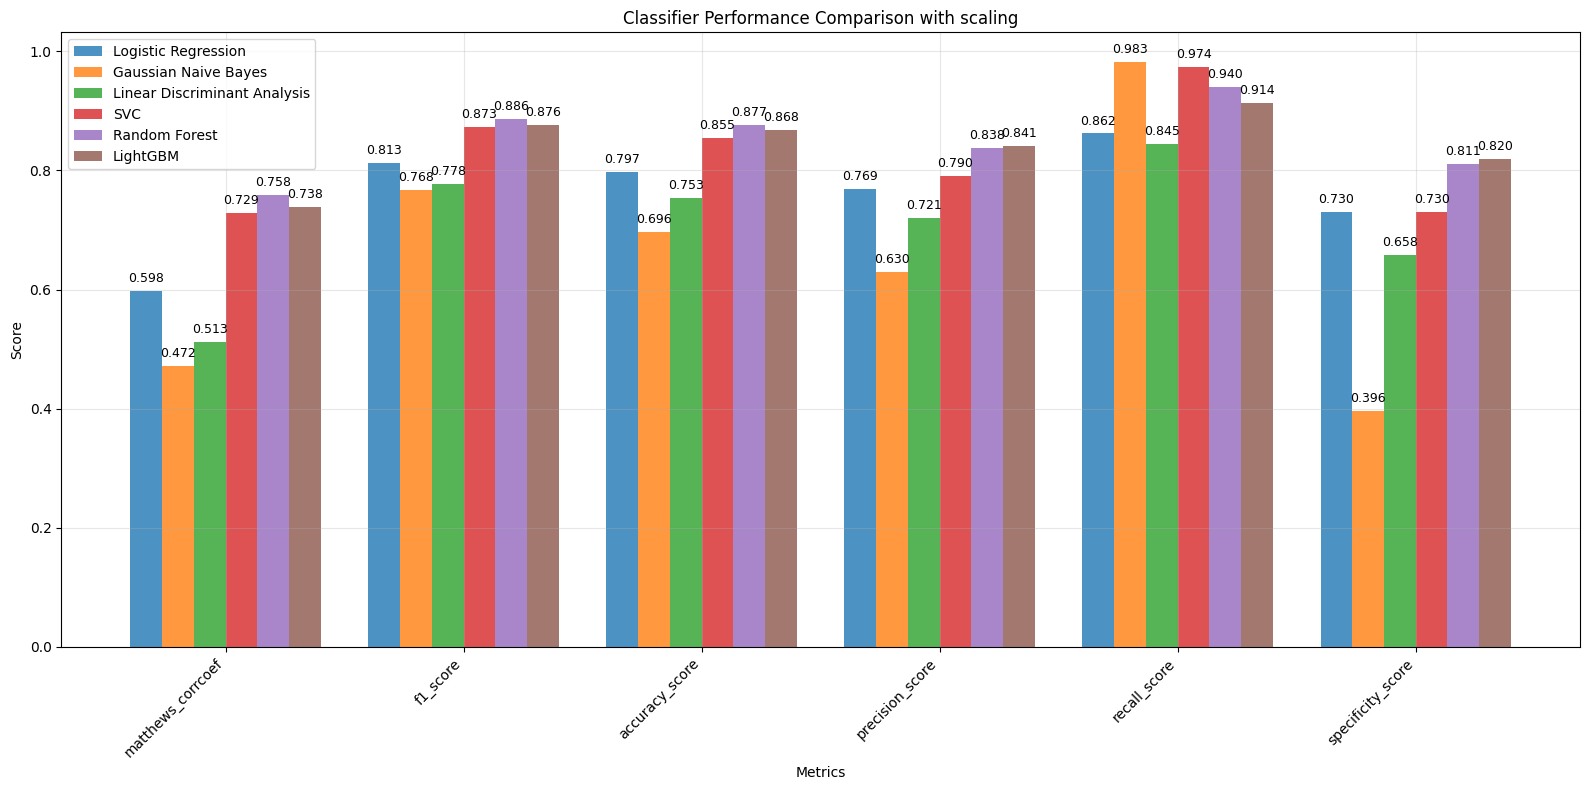

In [16]:
metrics5 = check_baseline(X_imputed, y)